# Import Libraries & Dataframe

In [21]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [22]:
# Import Dataframe
path = r'/Users/hollyringsak/01-2024 Instacart Basket Analysis'
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))

In [23]:
df_final.head()

,Gender,State,Age,number_of_dependents,fam_status,income,product_id,product_name,department_id,prices,...,days_since_last_order,reordered,median_days_since_last_order,department,age_group,income_group,dependants_group,age_income_profile,fam_dependants_profile,fam_age_profile
0,Female,Connecticut,80,1,married,166726,28,Wheat Chex Cereal,14,10.1,...,NaN,0,8.0,breakfast,Senior,High Income,Has Dependants,High Income Senior,Married w/ Dependants,Married Senior
3,Male,Iowa,68,0,divorced/widowed,135470,28,Wheat Chex Cereal,14,10.1,...,4.0,0,3.0,breakfast,Older Adult,High Income,No Dependants,High Income Older Adult,Single No Dependants,Single Older Adult
4,Male,Nebraska,58,3,married,119144,28,Wheat Chex Cereal,14,10.1,...,26.0,0,30.0,breakfast,Middle-Aged Adult,High Income,Has Dependants,High Income Middle-Aged Adult,Married w/ Dependants,Married Middle-Aged Adult
6,Female,Maine,58,2,married,87975,28,Wheat Chex Cereal,14,10.1,...,3.0,0,6.0,breakfast,Middle-Aged Adult,Mid Income,Has Dependants,Mid Income Middle-Aged Adult,Married w/ Dependants,Married Middle-Aged Adult
7,Male,Minnesota,63,2,married,96160,28,Wheat Chex Cereal,14,10.1,...,14.0,0,13.0,breakfast,Older Adult,Mid Income,Has Dependants,Mid Income Older Adult,Married w/ Dependants,Married Older Adult


In [24]:
df_final.columns

Index(['Gender', 'State', 'Age', 'number_of_dependents', 'fam_status',
       'income', 'product_id', 'product_name', 'department_id', 'prices',
       'order_id', 'number_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'price_range_loc', 'max_order', 'loyalty_flag',
       'Region', 'mean_prices', 'spending_flag', 'frequency_flag',
       'days_since_last_order', 'reordered', 'median_days_since_last_order',
       'department', 'age_group', 'income_group', 'dependants_group',
       'age_income_profile', 'fam_dependants_profile', 'fam_age_profile'],
      dtype='object')

# Creating Visualizations

# 1. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0.5, 0.98, 'Frequency of Price Ranges')

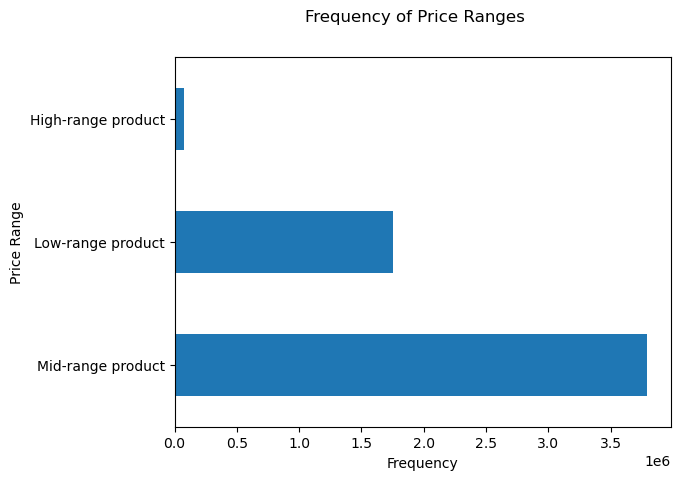

In [25]:
# Plot bar chart of distribution of price_range_loc
price_range_bar = df_final['price_range_loc'].value_counts().plot.barh()
# Create labels
plt.xlabel("Frequency")
plt.ylabel("Price Range")
plt.suptitle("Frequency of Price Ranges")

In [26]:
# Export chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar.png'))

In [27]:
# Find value counts
df_final['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     3790002
Low-range product     1754358
High-range product      72339
Name: count, dtype: int64

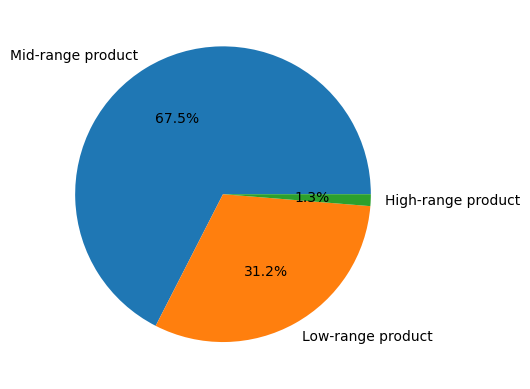

In [28]:
# Plot pie chart
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = [3790002, 1754358, 72339]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_pie.png'))

# Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

Text(0, 0.5, 'Frequency')

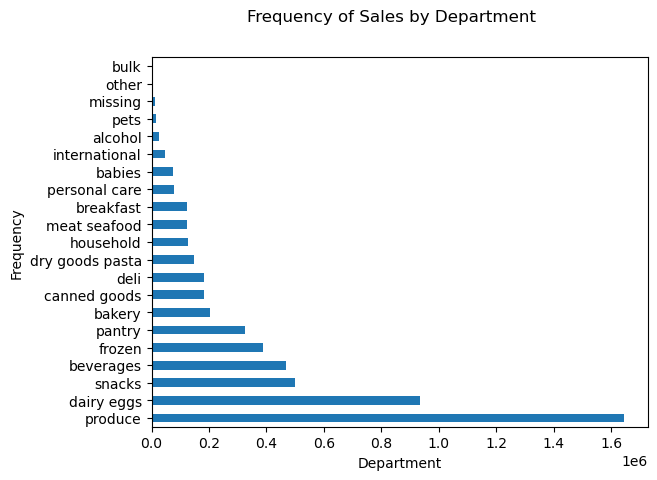

In [29]:
department_bar = df_final['department'].value_counts().plot.barh()

plt.suptitle('Frequency of Sales by Department')
plt.xlabel('Department')
plt.ylabel('Frequency')

In [30]:
# Export chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [31]:
# Finding the top 10 most popular products
df_final['product_name'].value_counts(dropna = False).head(10)

product_name
Banana                    81742
Bag of Organic Bananas    66549
Organic Strawberries      45887
Organic Baby Spinach      41807
Organic Hass Avocado      37540
Organic Avocado           30494
Large Lemon               26068
Strawberries              24787
Limes                     24319
Organic Raspberries       23910
Name: count, dtype: int64

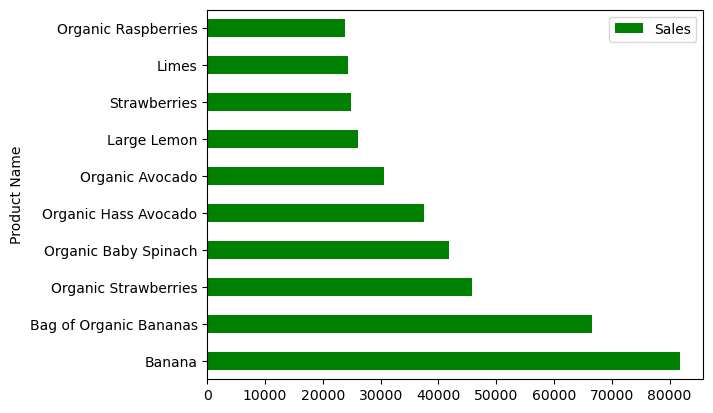

In [35]:
df = pd.DataFrame({'Product Name': ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Raspberries'], 'Sales': [81742, 66549, 45887, 41807, 37540, 30494, 26068, 24787, 24319, 23910]})
ax = df.plot.barh(x='Product Name', y='Sales', color= 'green')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_sales_bar.png'))

#  What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [36]:
# Find value counts
df_final['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    2813735
Loyal customer      1833303
New customer         969661
Name: count, dtype: int64

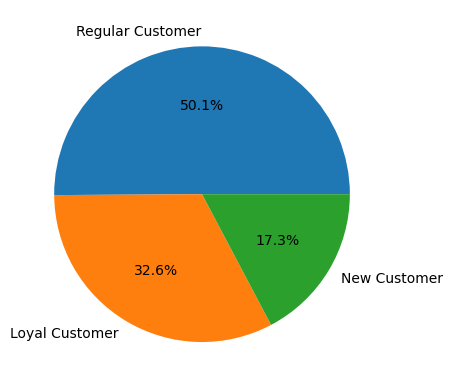

In [37]:
# Plot pie chart
labels = 'Regular Customer', 'Loyal Customer', 'New Customer'
sizes = [2813735, 1833303, 969661]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_flag_pie.png'))

Text(0.5, 0.98, 'Frequency of Loyal Customers')

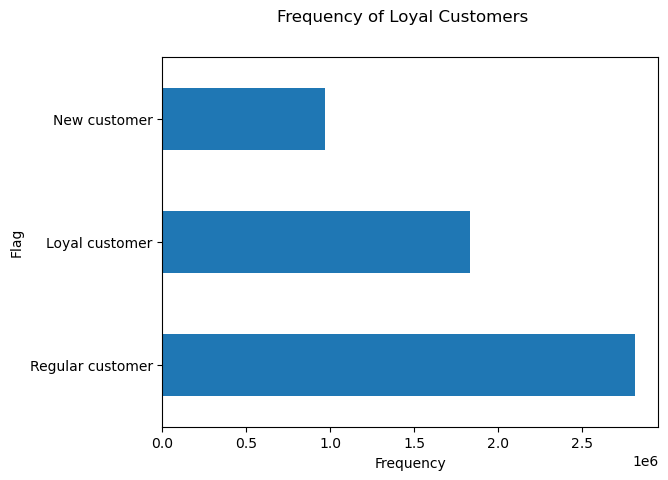

In [38]:
# Plot bar chart of distribution of loyatly_flag
loyalty_flag_barh = df_final['loyalty_flag'].value_counts().plot.barh()
# Create labels
plt.xlabel("Frequency")
plt.ylabel("Flag")
plt.suptitle("Frequency of Loyal Customers")

In [39]:
# Export chart
loyalty_flag_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_barh.png'))

# Are there differences in ordering habits based on a customer’s loyalty status?

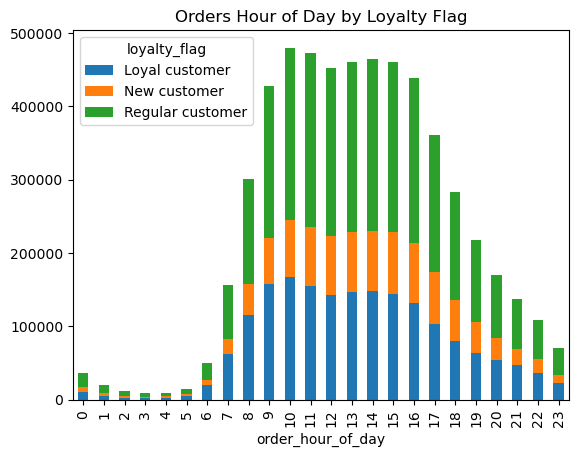

In [40]:
# Create a stacked bar chart to show order hour of the day by loyalty flag
hour_of_day_loyalty = df_final.groupby(['order_hour_of_day','loyalty_flag']).size().unstack()

# Sort values, ascending
hour_of_day_loyalty.loc[hour_of_day_loyalty.sum(axis = 1).sort_values(ascending = True).index]

#Create Stack Bar Chart
hour_of_day_loyalty = hour_of_day_loyalty.plot.bar(stacked = True, title ='Orders Hour of Day by Loyalty Flag')

In [41]:
# Export chart
hour_of_day_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_loyalty.png'))

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='order_hour_of_day', ylabel='number_of_orders'>

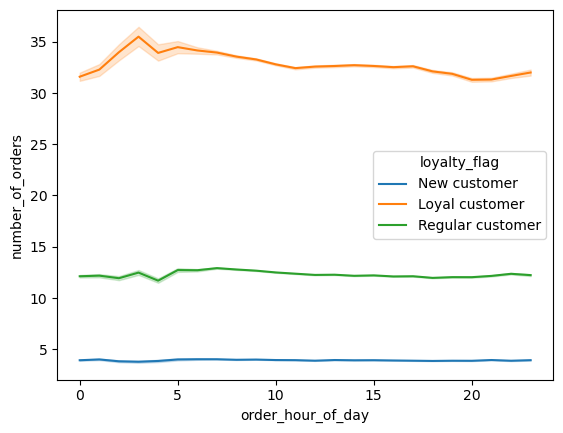

In [42]:
sns.lineplot(data=df_final, x="order_hour_of_day", y="number_of_orders", hue="loyalty_flag")

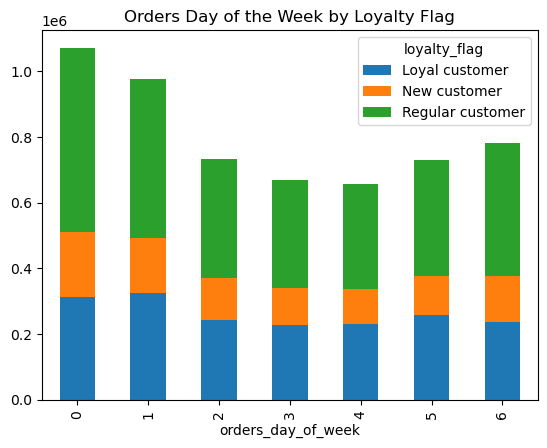

In [43]:
# Create a stacked bar chart to show order day of week by loyalty flag
day_of_week_loyalty = df_final.groupby(['orders_day_of_week','loyalty_flag']).size().unstack()

# Sort values, ascending
day_of_week_loyalty.loc[day_of_week_loyalty.sum(axis = 1).sort_values(ascending = True).index]

#Create Stack Bar Chart
day_of_week_loyalty = day_of_week_loyalty.plot.bar(stacked = True, title ='Orders Day of the Week by Loyalty Flag')

In [44]:
day_of_week_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_of_week_loyalty.png'))

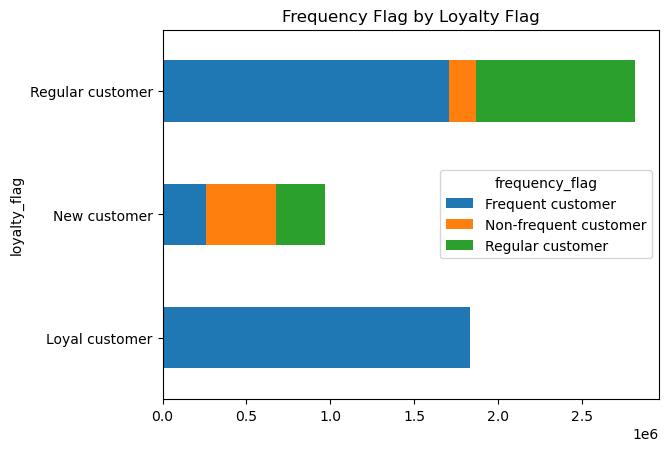

In [45]:
# Create a stacked bar chart to show order day of week by loyalty flag
frequency_loyalty = df_final.groupby(['loyalty_flag','frequency_flag']).size().unstack()

# Sort values, ascending
frequency_loyalty.loc[frequency_loyalty.sum(axis = 1).sort_values(ascending = True).index]

#Create Stack Bar Chart
frequency_loyalty = frequency_loyalty.plot.barh(stacked = True, title ='Frequency Flag by Loyalty Flag')

In [46]:
frequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_loyalty.png'))

# Are there differences in ordering habits based on a customer’s region?

In [47]:
# Filter nan values out of region
final_filtered = df_final[df_final['Region'] != 'nan']

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Daily Number of Orders by Region')

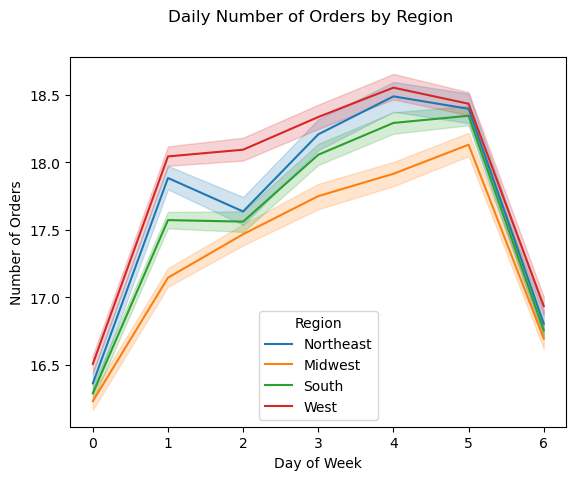

In [48]:
line_week_region = sns.lineplot(data=final_filtered, x="orders_day_of_week", y="number_of_orders", hue="Region")
# Label
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.suptitle("Daily Number of Orders by Region")

In [49]:
line_week_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_week_region.png'))

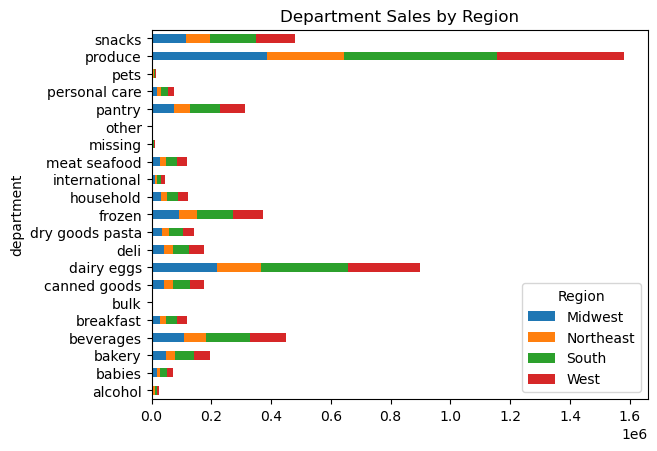

In [50]:
# Create a stacked bar chart to show order day of week by loyalty flag
region_department = final_filtered.groupby(['department','Region']).size().unstack()

# Sort values, ascending
region_department.loc[region_department.sum(axis = 1).sort_values(ascending = True).index]

#Create Stack Bar Chart
region_department = region_department.plot.barh(stacked = True, title ='Department Sales by Region')

In [51]:
region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_department.png'))

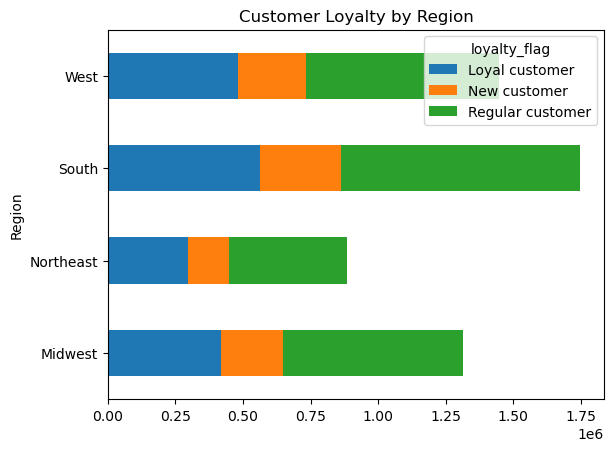

In [52]:
# Create a stacked bar chart to show order day of week by loyalty flag
loyalty_region = final_filtered.groupby(['Region','loyalty_flag']).size().unstack()

# Sort values, ascending
loyalty_region.loc[loyalty_region.sum(axis = 1).sort_values(ascending = True).index]

#Create Stack Bar Chart
loyalty_region = loyalty_region.plot.barh(stacked = True, title ='Customer Loyalty by Region')

In [53]:
loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region.png'))

# Is there a connection between age and family status in terms of ordering habits?

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Daily Number of Orders by Age')

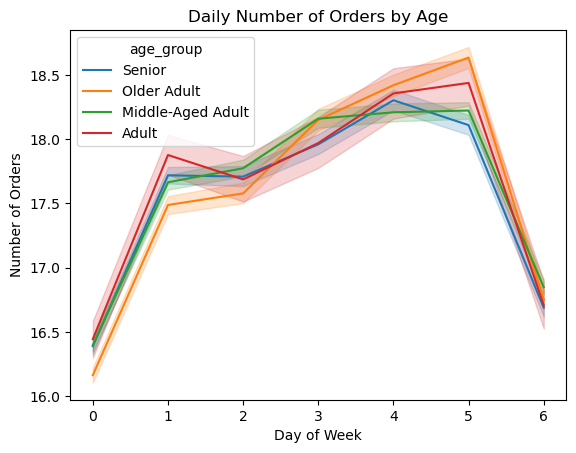

In [54]:
# Create line graph to show number of orders throughout the week by age group
age_group_line = sns.lineplot(data=df_final, x="orders_day_of_week", y="number_of_orders", hue="age_group")
# Label
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.suptitle("Daily Number of Orders by Age")

In [55]:
age_group_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_line.png'))

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Daily Number of Orders by Family Status')

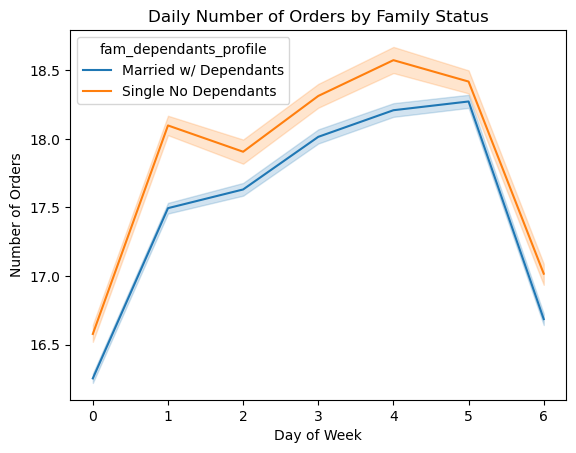

In [56]:
# Create line graph to show number of orders throughout the week by fam status
fam_status_line = sns.lineplot(data=df_final, x="orders_day_of_week", y="number_of_orders", hue="fam_dependants_profile")
# Label
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.suptitle("Daily Number of Orders by Family Status")

In [57]:
fam_status_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_line.png'))

In [58]:
# Find value counts
df_final['age_group'].value_counts(dropna = False)

age_group
Middle-Aged Adult    2232944
Senior               1633129
Older Adult          1466113
Adult                 284513
Name: count, dtype: int64

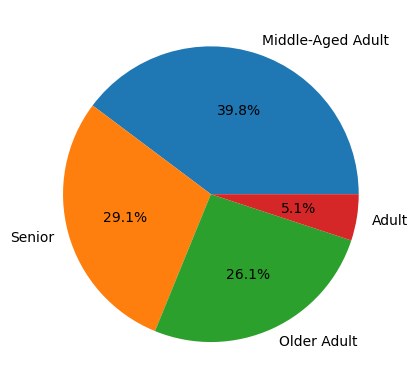

In [59]:
# Plot pie chart
labels = 'Middle-Aged Adult', 'Senior', 'Older Adult', 'Adult'
sizes = [2232944, 1633129, 1466113, 284513]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_pie.png'))

In [60]:
# Find value counts
df_final['fam_status'].value_counts(dropna = False)

fam_status
married             4210823
divorced/widowed     811865
single               594011
Name: count, dtype: int64

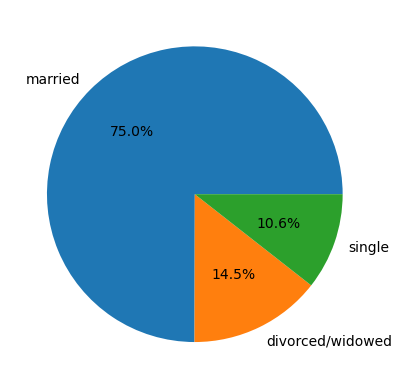

In [61]:
# Plot pie chart
labels = 'married', 'divorced/widowed', 'single'
sizes = [4210823, 811865, 594011]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_pie.png'))

Text(0.5, 0.98, 'Frequency of Age/Fam Status Group')

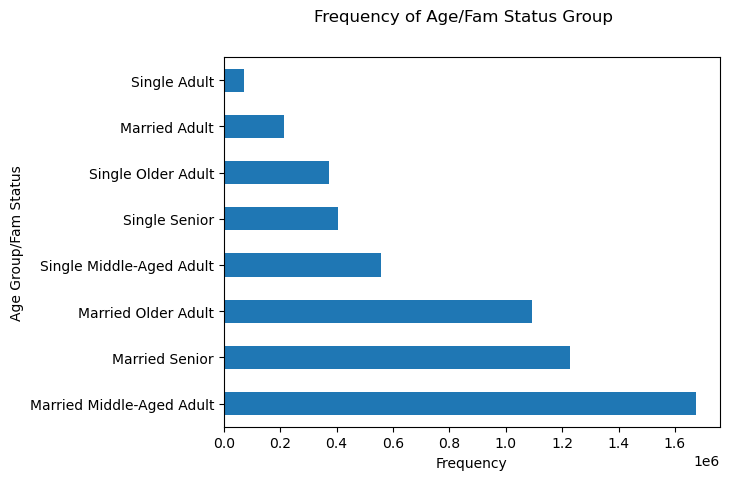

In [62]:
# Plot bar chart of distribution of age_group
fam_age_frequency = df_final['fam_age_profile'].value_counts().plot.barh()
# Create labels
plt.xlabel("Frequency")
plt.ylabel("Age Group/Fam Status")
plt.suptitle("Frequency of Age/Fam Status Group")

In [63]:
fam_age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_age_frequency.png'))

#  What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [64]:
# Find value counts
df_final['age_income_profile'].value_counts(dropna = False)

age_income_profile
High Income Middle-Aged Adult    1552189
High Income Senior               1141197
High Income Older Adult          1023135
Mid Income Middle-Aged Adult      489344
Mid Income Senior                 355475
Mid Income Older Adult            319402
Low Income Middle-Aged Adult      191411
Mid Income Adult                  174623
Low Income Senior                 136457
Low Income Older Adult            123576
High Income Adult                  72891
Low Income Adult                   36999
Name: count, dtype: int64

Text(0.5, 0.98, 'Frequency of Age/Income Group')

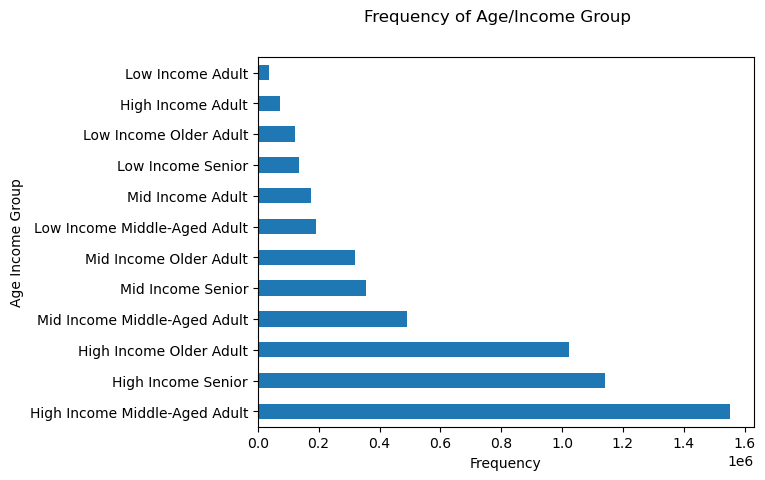

In [65]:
# Plot bar chart of distribution of age_group
age_income_frequency = df_final['age_income_profile'].value_counts().plot.barh()
# Create labels
plt.xlabel("Frequency")
plt.ylabel("Age Income Group")
plt.suptitle("Frequency of Age/Income Group")

In [66]:
age_income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_frequency.png'))

In [67]:
# Find value counts
df_final['age_income_profile'].value_counts(dropna = False)

age_income_profile
High Income Middle-Aged Adult    1552189
High Income Senior               1141197
High Income Older Adult          1023135
Mid Income Middle-Aged Adult      489344
Mid Income Senior                 355475
Mid Income Older Adult            319402
Low Income Middle-Aged Adult      191411
Mid Income Adult                  174623
Low Income Senior                 136457
Low Income Older Adult            123576
High Income Adult                  72891
Low Income Adult                   36999
Name: count, dtype: int64

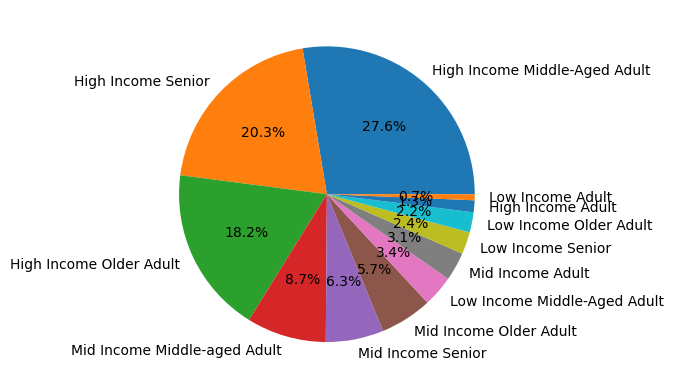

In [68]:
# Plot pie chart
labels = 'High Income Middle-Aged Adult', 'High Income Senior', 'High Income Older Adult', 'Mid Income Middle-aged Adult', 'Mid Income Senior', 'Mid Income Older Adult', 'Low Income Middle-Aged Adult', 'Mid Income Adult', 'Low Income Senior', 'Low Income Older Adult', 'High Income Adult', 'Low Income Adult'
sizes = [1552189, 1141197, 1023135, 489344, 355475, 319402, 191411, 174623, 136457, 123576, 72891, 36999]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_pie.png'))